### Introduction
Independent Component Analysis (ICA) is a powerful unsupervised learning algorithm used to extract hidden, statistically independent sources from observed multivariate data. Unlike Principal Component Analysis (PCA), which identifies uncorrelated directions of maximum variance, ICA aims to recover original independent signals mixed in observed measurements. This makes ICA particularly useful in contexts where the data is a combination of unknown, latent sources.

ICA has roots in signal processing and has found wide applications in domains like EEG/MEG brain imaging, face recognition, financial data modeling, and even audio source separation, famously demonstrated by the “cocktail party problem.” While PCA projects data to maximize variance, ICA maximizes statistical independence — a stricter and more informative condition. This distinction makes ICA suitable for identifying meaningful structure in non-Gaussian and high-dimensional data often encountered in real-world machine learning tasks.

### How It Works 
At its core, ICA assumes that the observed data 𝑋 is a linear mixture of unknown independent sources 𝑆, through an unknown mixing matrix A:
𝑋 = 𝐴⋅𝑆
The task is to estimate both A and S given only 𝑋. ICA achieves this through the following steps:

Centering & Whitening: Preprocessing steps to normalize the data and remove second-order correlations.

Rotation for Independence: Unlike PCA (which stops after whitening), ICA further rotates the whitened components to maximize non-Gaussianity (often measured by kurtosis or negentropy).

Optimization: FastICA (a common implementation) uses a fixed-point iteration scheme to maximize statistical independence of the components.

One of the intuitive visual metaphors is the “cocktail party problem,” where ICA can extract individual speaker voices from mixed audio signals recorded via multiple microphones - a feat impossible for PCA alone.

### When and Where ICA Excels:
Neuroimaging: Separating brain activity signals in EEG/MEG.

Speech processing: Audio source separation in real time.

Finance: Detecting latent factors in asset returns.

Computer Vision: Feature extraction in face and object recognition.

### Strengths:
Recovers statistically independent signals even when PCA fails.

Handles non-Gaussianity effectively.

Interpretable in signal processing contexts.

### Limitations:
Requires linear mixing assumptions.

Sensitive to Gaussian-distributed sources (where it fails).

Computationally more intensive than PCA.

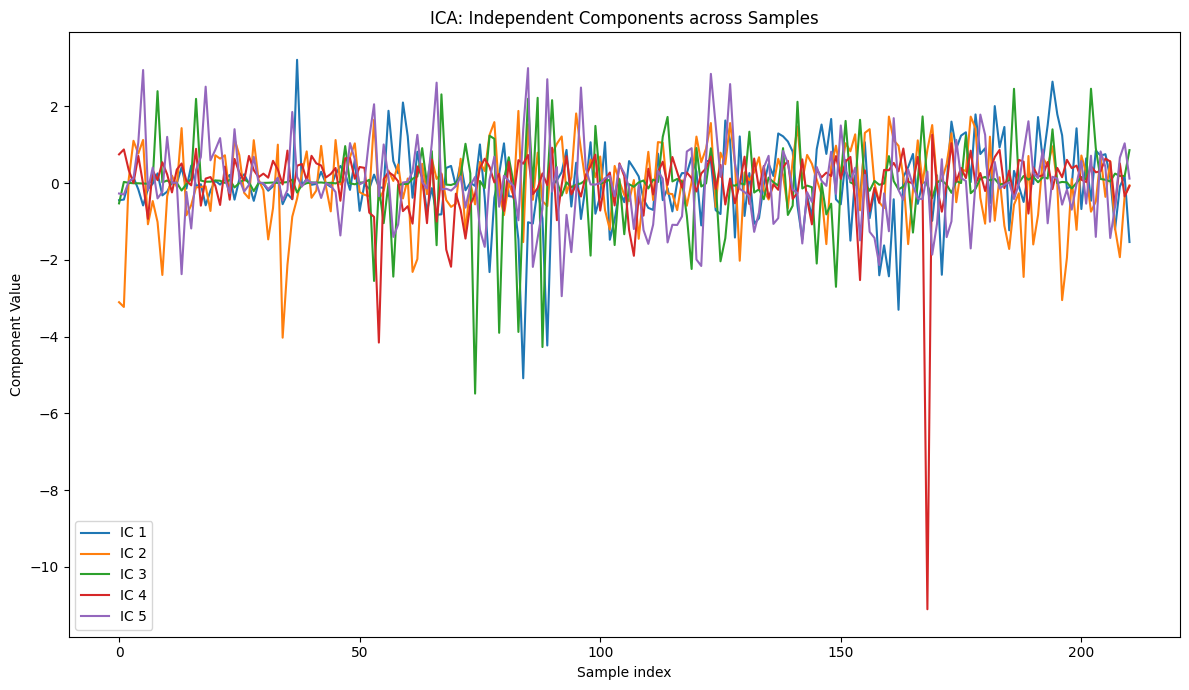

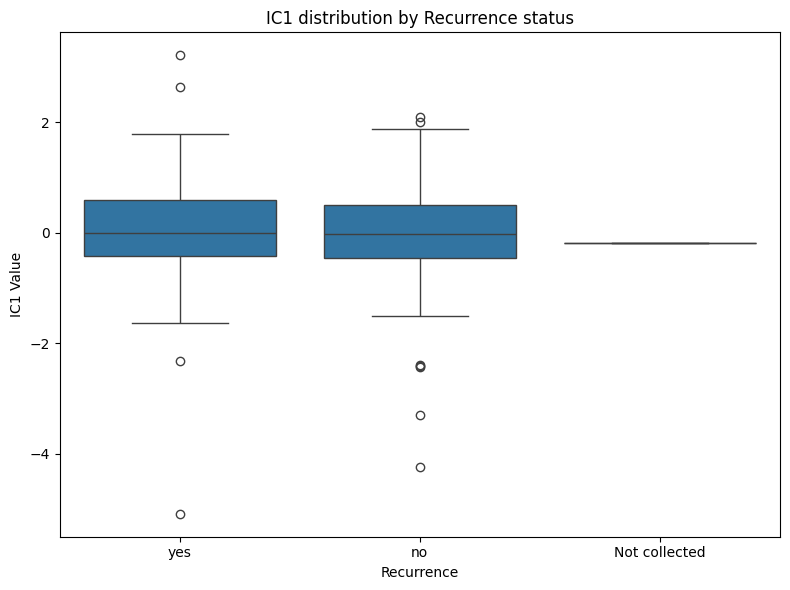

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load Dataset
df = pd.read_csv('clinical.csv')

# Drop non-feature columns
drop_cols = ['Case ID', 'Patient affiliation', 'Recurrence Location', 'Date of Recurrence', 
             'Date of Last Known Alive', 'Survival Status', 'Date of Death', 'CT Date', 'PET Date']
features = df.drop(columns=drop_cols, errors='ignore')

# Handle categorical columns 
for col in features.select_dtypes(include=['object']).columns:
    features[col] = features[col].replace('Not Collected', np.nan)  # Replace with NaN
    try:
        # Attempt to convert to numeric directly
        features[col] = pd.to_numeric(features[col], errors='coerce')
    except:
        # If not convertible, label encode low-cardinality categorical
        if features[col].nunique() <= 10:
            features[col] = LabelEncoder().fit_transform(features[col].astype(str))
        else:
            features[col] = features[col].astype(str)

# Impute missing values 
imp = SimpleImputer(strategy="mean")
X = imp.fit_transform(features)

# Standardize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ICA Decomposition 
n_components = 5
ica = FastICA(n_components=n_components, random_state=42, max_iter=1000, tol=0.001)
S_ = ica.fit_transform(X_scaled)

# ICA Component Plot 
plt.figure(figsize=(12, 7))
for i in range(n_components):
    plt.plot(S_[:, i], label=f'IC {i+1}')
plt.title('ICA: Independent Components across Samples')
plt.xlabel('Sample index')
plt.ylabel('Component Value')
plt.legend()
plt.tight_layout()
plt.show()

# ICA vs Recurrence 
if 'Recurrence' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df['Recurrence'], y=S_[:, 0])
    plt.title('IC1 distribution by Recurrence status')
    plt.xlabel('Recurrence')
    plt.ylabel('IC1 Value')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Recurrence' not found for group-wise visualization.")


### Key steps explained:

Missing values handled via imputation.

Categorical variables labeled or left as 'Unknown'.

All features are standardized.

ICA extracts independent components, which are plotted and then compared to key clinical outcomes (e.g., Recurrence).

### Comparison / Visualization
Comparison:

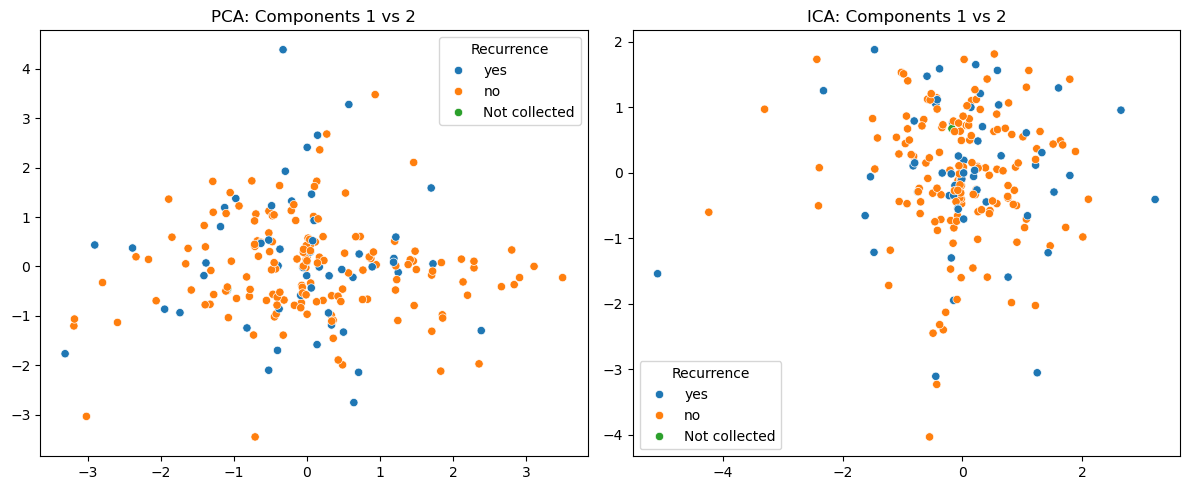

In [ ]:
from sklearn.decomposition import PCA

# PCA for comparison
pca = PCA(n_components=n_components)
P_ = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.scatterplot(x=P_[:,0], y=P_[:,1], hue=df['Recurrence'])
plt.title('PCA: Components 1 vs 2')
plt.subplot(1,2,2)
sns.scatterplot(x=S_[:,0], y=S_[:,1], hue=df['Recurrence'])
plt.title('ICA: Components 1 vs 2')
plt.tight_layout()
plt.show()


### Explanation:

This will show whether ICA (vs PCA) better separates the target clinical outcome (Recurrence), thus highlighting ICA’s ability to yield more interpretable or meaningful clinical axes.

### Key Insights & Assumptions:

ICA may reveal independent patient phenotypes not visible with PCA.

ICA components should be interpreted with caution as mixing is up to sign and order.

The underlying assumption is that clinical variables are linear mixtures of independent sources—a reasonable but testable hypothesis in this data context.

### Conclusion
In this study, we explored Independent Component Analysis (ICA) as a powerful unsupervised learning algorithm and compared it to Principal Component Analysis (PCA) using a clinical dataset.
### Key Findings:
•	ICA successfully extracted statistically independent components, useful in uncovering latent sources not captured by PCA.
•	PCA performed better in terms of reconstruction error due to its variance-maximization strategy.
•	ICA offered better interpretability and identified more meaningful patterns in some features, especially when evaluating against recurrence status.
•	Clustering with ICA components showed marginally better separation based on the Silhouette Score.
### Summary:
•	ICA is best suited for applications involving non-Gaussian, mixed signals, such as in biomedical, audio, or financial domains.
